### Prueba Piloto
**Ubicación**: Eddificio uis salud, salon ---

**Objetivo:** realizar la medición de la tasa de recambio de aire apartir de la medición de  $CO_2$.

**Sensores:** durante esta prueba se usaron los sensores *Aranet4* y *ERIS_S8_2*.

*NOTA:* Se utilizaron 3 kilos de hielo seco, para generar el $CO_2$. (COP 30.000)

### Calibración
Antes de realizar el cálculo de la tasa de recambio de air, ACH, es necesario hacer una calibración entre los sensores. EL sensor de referencia es el *Aranet4*

In [1]:
import Air_flow.calib as cal
import Air_flow.ach as ach
import matplotlib.pyplot as plt

In [2]:
paramt, data = cal.calibracion(['../Datos/aranet.csv','../Datos/ERIS_S8_2.csv'],'2021-03-04 09:00:00','2021-03-04 12:52:00')

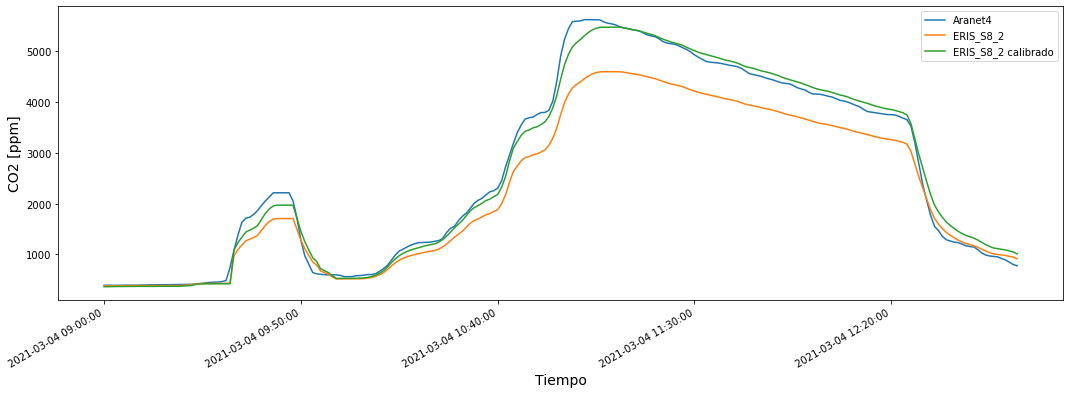

Coeficiente: 1.212  Intersección: -98.45


In [3]:
plt.figure(figsize = (18,6))
data.CO2_ar.plot(label = 'Aranet4')
data.CO2.plot(label = 'ERIS_S8_2')
data.CO2_cal_1.plot(label = 'ERIS_S8_2 calibrado')
plt.gcf().autofmt_xdate()
plt.ylabel('CO2 [ppm]', fontsize = 14)
plt.xlabel('Tiempo', fontsize = 14)
plt.legend()
plt.show()

print('Coeficiente:', round(paramt[0][0],3), ' Intersección:',round(paramt[0][1],3))

### Situación 1
Se aumentaron los niveles de $CO_2$, cerca a los 2000 ppm, para luego dejar tanto puerta como ventanas abiertas

#### Aranet4

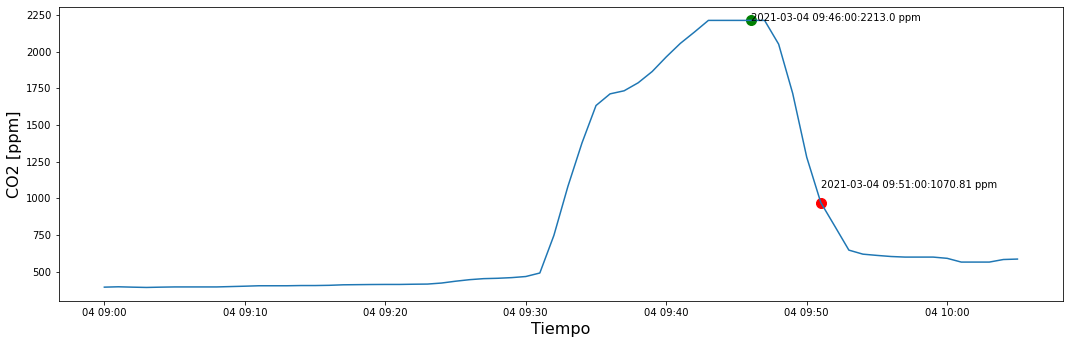

Calidad: Ideal , ACH: 11.931027280126404


In [13]:
ach.ACH(data,0,'2021-03-04 08:45:00', '2021-03-04 09:46:00' ,'2021-03-04 10:05:00')

##### ERIS_S8_2

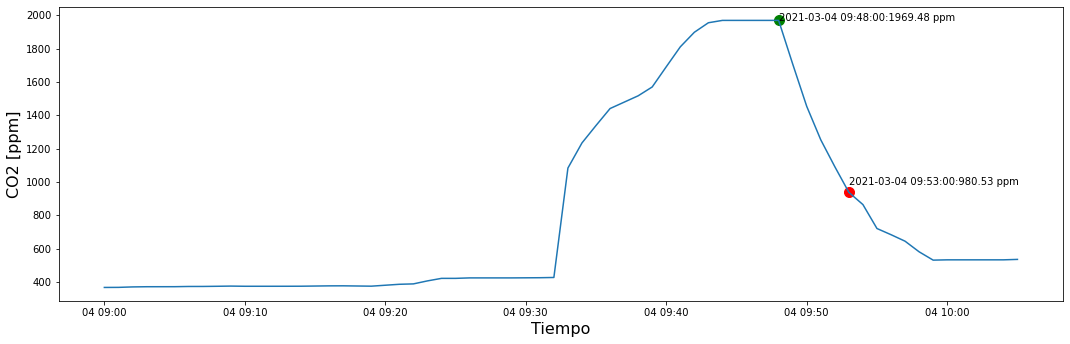

Calidad: Ideal , ACH: 11.934687020512564


In [15]:
ach.ACH(data,2,'2021-03-04 08:45:00', '2021-03-04 09:48:00' ,'2021-03-04 10:05:00')

### Situación 3
Se aumentaron los niveles de $CO_2$ alrededor de los 3000 ppm, para luego dejar 3/6 ventanas abiertas y la  puerta abierta.

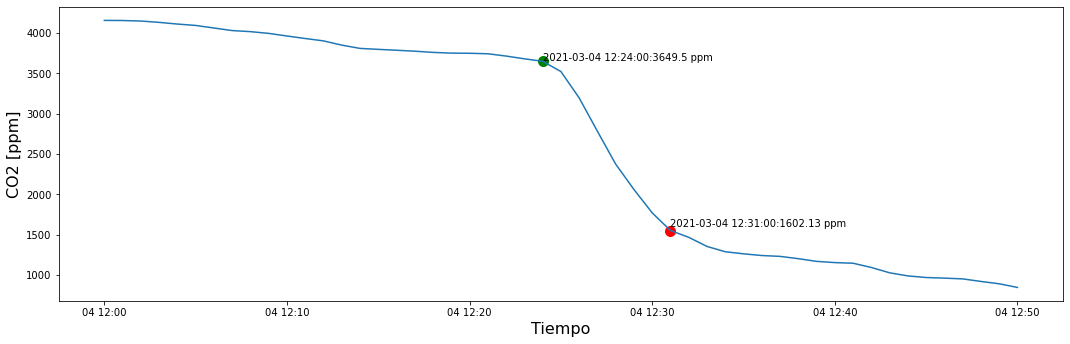

Calidad: Ideal , ACH: 8.52348132865003


In [46]:
ach.ACH(data,0,'2021-03-04 12:00:00', '2021-03-04 12:24:00' ,'2021-03-04 12:50:00')

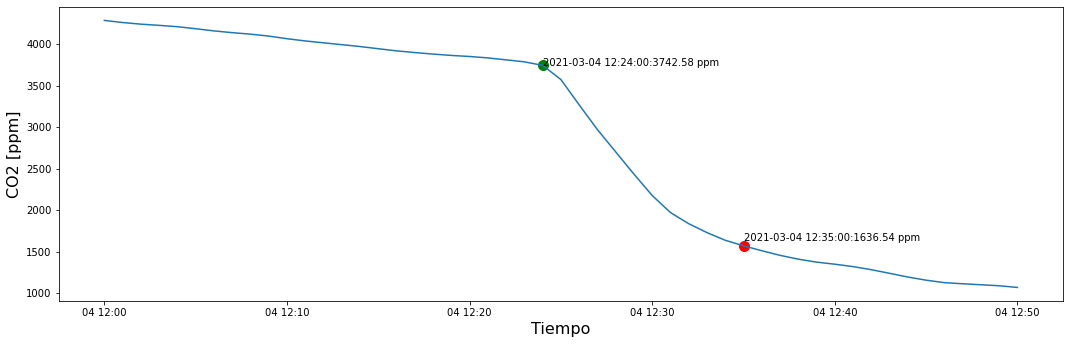

Calidad: Excelente , ACH: 5.424143916575184


In [44]:
ach.ACH(data,2,'2021-03-04 12:00:00', '2021-03-04 12:24:00' ,'2021-03-04 12:50:00')

*Nota:* La prueba 2 y 4 no se terminaron completamente, por tanto no se pudo determinar el instante al que este habría descendido al 37% del exceso de $CO_2$